# 가우시안 혼합 모형
- 전체 집단의 하위 집단이 여러개의 가우시안 분포라고 가정
- EM 알고리즘 (Expectation Maxmization Algorithm)을 통해 파라미터를 추정

1) 임의의 방법으로 추정하려는 파라미터 (하위집단 분포의 평균, 표준편차, 전체 집단에서의 비율) 초기화

2) E-step: 어떤 데이터가 특정 하위 집단에서 추출되었을 확률 계산

3) M-step: 각 하위 집단의 파라미터 추정

4) 2, 3 단계를 반복

# 가우시안 혼합 모형 실습

### 데이터 생성

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=200,
                 n_features=2,
                 centers=2,
                 random_state=2)

### 생성된 데이터 차원 확인

In [3]:
print(X.shape)
print(y.shape)

(200, 2)
(200,)


### 라벨링되지 않은 데이터 플롯

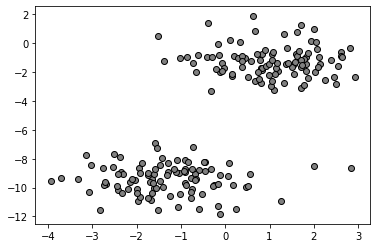

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1],
           c='gray',
           edgecolor='black',
           marker='o')
plt.show()

### 가우시안 혼합 모형

In [8]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2,                   # 두 개의 클러스터
                    random_state=0)
gmm.fit(X)
label_gmm = gmm.predict(X)
print(label_gmm)

[1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1
 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0
 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1
 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1
 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0]


### 시각화를 위한 데이터 프레임 생성

In [12]:
import pandas as pd
gmm_columns = ['gmm_comp1', 'gmm_comp2']
X_gmm_df = pd.DataFrame(X, columns=gmm_columns)
X_gmm_df['target'] = y
X_gmm_df['label_gmm'] = label_gmm
X_gmm_df.head(5)

,gmm_comp1,gmm_comp2,target,label_gmm
0,0.381155,-1.644815,1,1
1,-0.583904,-8.784059,0,0
2,1.830865,-1.425235,1,1
3,1.813135,-1.924671,1,1
4,-1.655771,-9.555946,0,0


### 타깃 클래스 종류 확인

In [13]:
print(set(X_gmm_df['target']))
print(set(X_gmm_df['label_gmm']))

{0, 1}
{0, 1}


### 가우시안 혼합 모형을 이용한 데이터 플롯

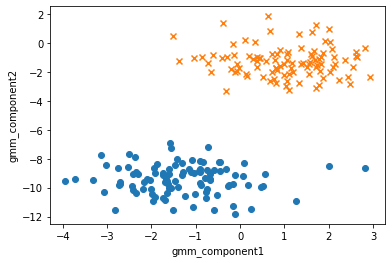

In [14]:
df = X_gmm_df
markers = ['o', 'x']

for i, mark in enumerate(markers):
    df_i = df[df['label_gmm']==i]
    target_i = i
    X1 = df_i['gmm_comp1']
    X2 = df_i['gmm_comp2']
    plt.scatter(X1, X2,
               marker=mark,
               label=target_i)

plt.xlabel('gmm_component1')
plt.ylabel('gmm_component2')
plt.show()

### 실제 타깃 플롯

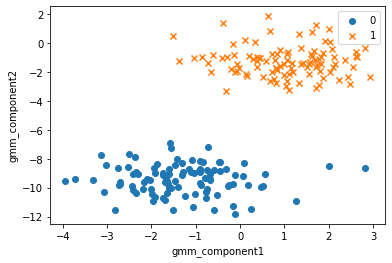

In [16]:
df = X_gmm_df
markers = ['o', 'x']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['gmm_comp1']
    X2 = df_i['gmm_comp2']
    plt.scatter(X1, X2,
               marker=mark,
               label=target_i)

plt.xlabel('gmm_component1')
plt.ylabel('gmm_component2')
plt.legend()
plt.show()

### 모형 평가

In [17]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(X, label_gmm)
print(sil_score)

0.7842908753561848
